### Load the Dataset

In [5]:
# import the library to get the data
from sklearn.datasets import fetch_openml
# from sklearn.model_selection import train_test_split
print('Imported')

Imported


In [6]:
mnistData = fetch_openml('mnist_784', parser='auto')
print('Data fetched')

Data fetched


In [23]:
# taking a look at the data
mnistData

{'data':        pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
 0           0       0       0       0       0       0       0       0       0   
 1           0       0       0       0       0       0       0       0       0   
 2           0       0       0       0       0       0       0       0       0   
 3           0       0       0       0       0       0       0       0       0   
 4           0       0       0       0       0       0       0       0       0   
 ...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
 69995       0       0       0       0       0       0       0       0       0   
 69996       0       0       0       0       0       0       0       0       0   
 69997       0       0       0       0       0       0       0       0       0   
 69998       0       0       0       0       0       0       0       0       0   
 69999       0       0       0       0       0       0       0       0       0   
 
      

In [54]:
# load the separate dataset into varaiables
X, y = mnistData['data'].to_numpy(), mnistData['target'].to_numpy()
print('Separeted Dataset')

Separeted Dataset


In [94]:
# One particular image
X[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [55]:
# spilt the dataset into train and test parts
# train images = 65000, test = 5000]
X_train, X_test = X[:65000], X[65000:]
y_train, y_test = y[:65000], y[65000:]
print('Done Splitting')

Done Splitting


In [71]:
# want see a particular image from the dataset, image is in the form 1D array of 784 cols, we have to reshape that
an_element = X_train[5150]
an_image = an_element.reshape(28, 28)
print('image array reshaped')

image array reshaped


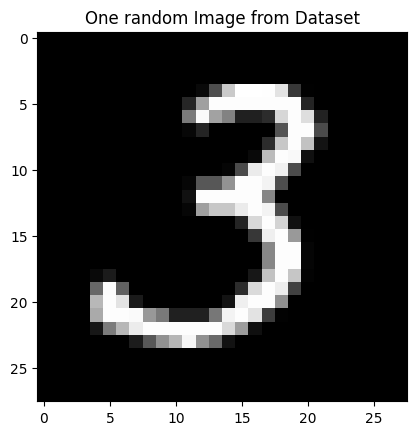

In [72]:
# plotting an image
import matplotlib.pyplot as plt
plt.imshow(an_image, cmap='gray')
plt.title('One random Image from Dataset')
plt.show()

In [74]:
# checking if the label matches the image
y_train[5150]

'3'

In [75]:
import numpy as np

# randomise or shuffle the data to remove patterns
shuffle_index = np.random.permutation(len(X_train))

# update train part to shuffled
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]
print('Data Shuffled')

Data Shuffled


image array reshaped


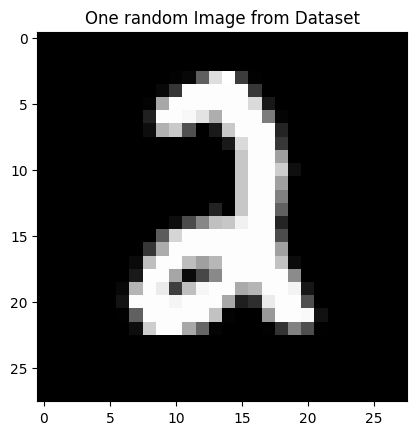

In [77]:
# plotting same index image to see if shuffled
an_element = X_train[5150]
an_image = an_element.reshape(28, 28)
print('image array reshaped')

# plotting an image
import matplotlib.pyplot as plt
plt.imshow(an_image, cmap='gray')
plt.title('One random Image from Dataset')
plt.show()

### Preprocessing Data

In [97]:
# Each image has 784 pixel and their values range from 0 to 255
# Preprocessing the data for Classication as we want pixel values between 0 and 1
# normalisation
X_train_reduced = X_train / 255.0
X_test_reduced = X_test / 255.0
print('Reduced Value in range of 0 and 1')

Reduced Value in range of 0 and 1


In [111]:
# One particular Image
X_test_reduced[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

### Classification

In [112]:
#import the required libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, confusion_matrix
print('Imported')

Imported


In [114]:
# the model training using fit()
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train_reduced, y_train)
print('Trained')

Trained


In [115]:
# saving this model locally on this machine
import joblib

model_fileName = 'logisticRegressionModel.joblib'
joblib.dump(logistic_model, model_fileName)
print(f'Model saved as {model_fileName}')

Model saved as logisticRegressionModel.joblib


### Predicting

In [117]:
# making prediction on test part of X
y_pred = logistic_model.predict(X_test)
y_pred

array(['3', '8', '9', ..., '4', '5', '6'], dtype=object)

In [120]:
# Evaluating metric for this model
log_acc = accuracy_score(y_test, y_pred)
log_pre = precision_score(y_test, y_pred, average='macro')
log_f1 = f1_score(y_test, y_pred, average='macro')
log_cm = confusion_matrix(y_test, y_pred)
print('Evaluated Metrics')

Evaluated Metrics


In [121]:
# printing the metrics
print(f'Accuracy Score {log_acc}')
print(f'Precision Score {log_pre}')
print(f'F1 Score {log_f1}')
print(f'Confusion Matrix\n {log_cm}')

Accuracy Score 0.8948
Precision Score 0.9201177107185255
F1 Score 0.8944085895979261
Confusion Matrix
 [[512   0   0   2   0   0   2   1   3   0]
 [  0 478   0   1   0   0   1   0  84   0]
 [  6   0 434   4   2   0   8   1  44   3]
 [  3   0   4 467   0   0   0   0  35   1]
 [  1   0   1   1 448   0   3   2  16  10]
 [  5   1   0  37   3 257  10   1 121   1]
 [  2   0   0   1   1   1 488   0   3   0]
 [  1   0   9   4   2   0   0 452   4  44]
 [  1   0   0   1   0   0   4   0 478   1]
 [  3   0   0   4   4   0   0   1  17 460]]


## Convolutional Neural Network using TensorFlow

In [122]:
# get the libraries
import tensorflow as tf
print('Imported')

Imported


In [169]:
# Reshape the data to add the channel dimension for grayscale images
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# Convert to float32 and normalize the pixel values to the range [0, 1]
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Convert class vectors to binary class matrices (one-hot encoding)
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

print('Data Reshaped')

Data Reshaped


### Model Building

In [147]:
# import library for model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
print('Imported')

Imported


In [148]:
# create an object of the model
cnn_model = Sequential()
print('Obj created')

Obj created


In [149]:
# Adding a layers of 32 filters
cnn_model.add(Conv2D(filters=32, kernel_size=3, padding='valid', activation='relu', input_shape=(28,28,1)))
cnn_model.add(MaxPool2D(pool_size=2))
print('Layer added')

Layer added


In [150]:
# Adding a layer with 64 filters
cnn_model.add(Conv2D(filters=64, kernel_size=3, padding='valid', activation='relu'))
cnn_model.add(MaxPool2D(pool_size=2))
print('Layer added')

Layer added


In [151]:
# Adding a layer with 128 filters
cnn_model.add(Conv2D(filters=128, kernel_size=3, padding='valid', activation='relu'))
cnn_model.add(MaxPool2D(pool_size=2))
print('Layer added')

Layer added


In [152]:
# Flatten the input
cnn_model.add(Flatten())
print('Flattened')

Flattened


In [153]:
# add hidden dense layer
cnn_model.add(Dense(units=128, activation='relu'))
print('Added hidden Dense layer')

Added hidden Dense layer


In [154]:
# add the final output layer, neurons = 10, as their are 10 different classes to classify among
cnn_model.add(Dense(units=10, activation='softmax'))
print('Added Final Layer')

Added Final Layer


In [155]:
# # Blueprint of CNN model architecture
# cnn_model = Sequential([
#     Conv2D(),
#     MaxPool2D,
#     Conv2D(),
#     MaxPool2D(),
#     Flatten(),
#     Dense(),
#     Dense()
# ])

In [165]:
# compile
cnn_model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 3, 3, 128)         73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 1, 1, 128)       

In [170]:
# Model training
training_mnist_history = cnn_model.fit(X_train, y_train, epochs=3, validation_data=(X_test, y_test))
print('Model Trained')

Epoch 1/3


InvalidArgumentError: Graph execution error:

Detected at node 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits' defined at (most recent call last):
    File "C:\Users\bahad\anaconda3\envs\tfvenv\lib\runpy.py", line 194, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Users\bahad\anaconda3\envs\tfvenv\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "C:\Users\bahad\anaconda3\envs\tfvenv\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "C:\Users\bahad\anaconda3\envs\tfvenv\lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
      app.start()
    File "C:\Users\bahad\anaconda3\envs\tfvenv\lib\site-packages\ipykernel\kernelapp.py", line 701, in start
      self.io_loop.start()
    File "C:\Users\bahad\anaconda3\envs\tfvenv\lib\site-packages\tornado\platform\asyncio.py", line 205, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\bahad\anaconda3\envs\tfvenv\lib\asyncio\windows_events.py", line 316, in run_forever
      super().run_forever()
    File "C:\Users\bahad\anaconda3\envs\tfvenv\lib\asyncio\base_events.py", line 570, in run_forever
      self._run_once()
    File "C:\Users\bahad\anaconda3\envs\tfvenv\lib\asyncio\base_events.py", line 1859, in _run_once
      handle._run()
    File "C:\Users\bahad\anaconda3\envs\tfvenv\lib\asyncio\events.py", line 81, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\bahad\anaconda3\envs\tfvenv\lib\site-packages\ipykernel\kernelbase.py", line 534, in dispatch_queue
      await self.process_one()
    File "C:\Users\bahad\anaconda3\envs\tfvenv\lib\site-packages\ipykernel\kernelbase.py", line 523, in process_one
      await dispatch(*args)
    File "C:\Users\bahad\anaconda3\envs\tfvenv\lib\site-packages\ipykernel\kernelbase.py", line 429, in dispatch_shell
      await result
    File "C:\Users\bahad\anaconda3\envs\tfvenv\lib\site-packages\ipykernel\kernelbase.py", line 767, in execute_request
      reply_content = await reply_content
    File "C:\Users\bahad\anaconda3\envs\tfvenv\lib\site-packages\ipykernel\ipkernel.py", line 429, in do_execute
      res = shell.run_cell(
    File "C:\Users\bahad\anaconda3\envs\tfvenv\lib\site-packages\ipykernel\zmqshell.py", line 549, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\bahad\anaconda3\envs\tfvenv\lib\site-packages\IPython\core\interactiveshell.py", line 3009, in run_cell
      result = self._run_cell(
    File "C:\Users\bahad\anaconda3\envs\tfvenv\lib\site-packages\IPython\core\interactiveshell.py", line 3064, in _run_cell
      result = runner(coro)
    File "C:\Users\bahad\anaconda3\envs\tfvenv\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\bahad\anaconda3\envs\tfvenv\lib\site-packages\IPython\core\interactiveshell.py", line 3269, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\bahad\anaconda3\envs\tfvenv\lib\site-packages\IPython\core\interactiveshell.py", line 3448, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "C:\Users\bahad\anaconda3\envs\tfvenv\lib\site-packages\IPython\core\interactiveshell.py", line 3508, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\bahad\AppData\Local\Temp\ipykernel_24984\175670240.py", line 2, in <module>
      training_mnist_history = cnn_model.fit(X_train, y_train, epochs=3, validation_data=(X_test, y_test))
    File "C:\Users\bahad\anaconda3\envs\tfvenv\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\bahad\anaconda3\envs\tfvenv\lib\site-packages\keras\engine\training.py", line 1564, in fit
      tmp_logs = self.train_function(iterator)
    File "C:\Users\bahad\anaconda3\envs\tfvenv\lib\site-packages\keras\engine\training.py", line 1160, in train_function
      return step_function(self, iterator)
    File "C:\Users\bahad\anaconda3\envs\tfvenv\lib\site-packages\keras\engine\training.py", line 1146, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\bahad\anaconda3\envs\tfvenv\lib\site-packages\keras\engine\training.py", line 1135, in run_step
      outputs = model.train_step(data)
    File "C:\Users\bahad\anaconda3\envs\tfvenv\lib\site-packages\keras\engine\training.py", line 994, in train_step
      loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\bahad\anaconda3\envs\tfvenv\lib\site-packages\keras\engine\training.py", line 1052, in compute_loss
      return self.compiled_loss(
    File "C:\Users\bahad\anaconda3\envs\tfvenv\lib\site-packages\keras\engine\compile_utils.py", line 265, in __call__
      loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\bahad\anaconda3\envs\tfvenv\lib\site-packages\keras\losses.py", line 152, in __call__
      losses = call_fn(y_true, y_pred)
    File "C:\Users\bahad\anaconda3\envs\tfvenv\lib\site-packages\keras\losses.py", line 272, in call
      return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\bahad\anaconda3\envs\tfvenv\lib\site-packages\keras\losses.py", line 2084, in sparse_categorical_crossentropy
      return backend.sparse_categorical_crossentropy(
    File "C:\Users\bahad\anaconda3\envs\tfvenv\lib\site-packages\keras\backend.py", line 5630, in sparse_categorical_crossentropy
      res = tf.nn.sparse_softmax_cross_entropy_with_logits(
Node: 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits'
labels must be 1-D, but got shape [32,10,10,10]
	 [[{{node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_train_function_3080]